<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек-и-модулей" data-toc-modified-id="Импорт-библиотек-и-модулей-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек и модулей</a></span></li><li><span><a href="#Загрузка-и-чтение-файла" data-toc-modified-id="Загрузка-и-чтение-файла-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка и чтение файла</a></span></li><li><span><a href="#Проверка-баланса-классов-целевого-признака" data-toc-modified-id="Проверка-баланса-классов-целевого-признака-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка баланса классов целевого признака</a></span></li><li><span><a href="#Подготовка-текстовых-данных-датафрейма" data-toc-modified-id="Подготовка-текстовых-данных-датафрейма-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Подготовка текстовых данных датафрейма</a></span></li><li><span><a href="#Разделение-данных-на-тренировочную-и-тестовую-выборки,-на-входные-и-целевой-признаки" data-toc-modified-id="Разделение-данных-на-тренировочную-и-тестовую-выборки,-на-входные-и-целевой-признаки-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Разделение данных на тренировочную и тестовую выборки, на входные и целевой признаки</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Обучение-и-поиск-лучшей-модели-с-подбором-гиперпараметров,-вывод-параметров-лучшей-модели" data-toc-modified-id="Обучение-и-поиск-лучшей-модели-с-подбором-гиперпараметров,-вывод-параметров-лучшей-модели-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обучение и поиск лучшей модели с подбором гиперпараметров, вывод параметров лучшей модели</a></span></li><li><span><a href="#Предсказание-лучшей-модели-на-тестовой-выборке-и-расчёт-метрики-F1" data-toc-modified-id="Предсказание-лучшей-модели-на-тестовой-выборке-и-расчёт-метрики-F1-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Предсказание лучшей модели на тестовой выборке и расчёт метрики F1</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп»

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### Импорт библиотек и модулей

In [18]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

from scipy.stats import uniform, randint 
import time

In [2]:
RANDOM_STATE = 42

### Загрузка и чтение файла

In [3]:
try:
    df = pd.read_csv('toxic_comments.csv')
except:
    df = pd.read_csv('/datasets/toxic_comments.csv')

### Проверка баланса классов целевого признака

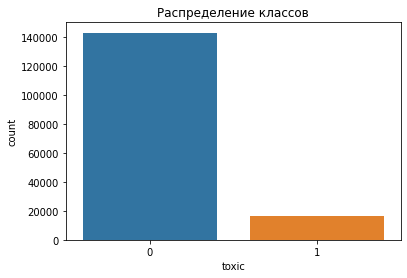

In [4]:
sns.countplot(x='toxic', data=df)
plt.title('Распределение классов')
plt.show()

На графике видно существенный дисбаланс классов. Это необходимо будет учесть при обучении моделей.

### Подготовка текстовых данных датафрейма

Загрузим модель SpaCy

In [5]:
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:  # Обработка ошибки, если модель не установлена
    print("Загрузка модели en_core_web_sm...")
    import spacy.cli
    spacy.cli.download("en_core_web_sm")
    nlp = spacy.load('en_core_web_sm')

Создадим и применим функцию для удаления всех небуквенных симоволов в столбце df['text']

In [6]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    return text

df['text'] = df['text'].apply(preprocess_text)

Получим доступ к стоп-словам из SpaCy

In [7]:
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'me', 'twenty', 'whereas', 'as', 'alone', 'afterwards', 'twelve', 'towards', 'he', 'down', 'either', 'already', '‘re', 'its', 'whose', 'itself', 'some', 'ten', 'about', 'besides', 'yourself', 'three', 'throughout', 'please', 'hence', "'re", 'who', 'other', 'had', 'while', 'anyhow', 'much', 'thence', 'how', 'your', 'mine', 'nobody', 'unless', 'since', 'hundred', '’d', 'perhaps', 'both', 'were', 'sixty', '‘s', 'using', 'former', 'just', 'get', 'also', 'from', 'others', "'d", 'himself', 'beforehand', 'via', 'none', 'meanwhile', 'nor', 'after', 'fifteen', 'name', 'might', 'by', 'where', 'with', 'under', 'which', 'up', 'indeed', 'could', 'whether', 'seems', 'five', 'has', 'often', 'therefore', 'off', 'herein', 'whoever', 'thereby', 'more', 'eight', 'almost', "'s", 'ever', 'thus', 'eleven', 'herself', 'very', 'ours', 'anyway', 'anyone', 'whole', 'someone', 'being', 'say', 'us', "'ll", 'may', 'put', 'can', 'always', 'not', 'this', 'each', 'hereupon', 'serious', 'another', 'themselves', 'did'

Создадим функцию для лемматизации

In [8]:
def lemmatize_text_spacy_no_stopwords(text):
    doc = nlp(text)
    lemmatized_words = [token.lemma_ for token in doc if not token.is_stop]
    return ' '.join(lemmatized_words)

Выполним проверку работоспособности функции для лемматизации

In [9]:
sentence1 = "The striped bats are hanging on their feet for best"
sentence2 = "you should be ashamed of yourself went worked"
df_my = pd.DataFrame([sentence1, sentence2], columns = ['text'])
print(df_my)

print(df_my['text'].apply(lemmatize_text_spacy_no_stopwords))

                                                text
0  The striped bats are hanging on their feet for...
1      you should be ashamed of yourself went worked
0    stripe bat hang foot good
1              ashamed go work
Name: text, dtype: object


Функция работоспособна

Применим функцию лемматизации и создадим новый столбец

In [11]:
from tqdm import tqdm
tqdm.pandas()
df['lemm_text'] = df['text'].progress_apply(lemmatize_text_spacy_no_stopwords)

100%|██████████| 159292/159292 [44:56<00:00, 59.07it/s] 


### Разделение данных на тренировочную и тестовую выборки, на входные и целевой признаки

Разделим данные на выборки

In [12]:
X = df['lemm_text']
y = df['toxic']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25, 
    random_state=RANDOM_STATE)

Уменьшим размер тренировочной выборки, т.к. у нас огромный объем данных и поиск лучшей модели займет большое количество времени

In [13]:
# Уменьшаем размер выборки
SAMPLE_SIZE = 50000

# Стратифицированная подвыборка
X_train_sampled, _, y_train_sampled, _ = train_test_split(
    X_train, 
    y_train,
    train_size=SAMPLE_SIZE if len(X_train) > SAMPLE_SIZE else len(X_train),  # Если X_train меньше SAMPLE_SIZE, берем все X_train
    stratify=y_train,
    random_state=RANDOM_STATE
)

## Обучение

### Обучение и поиск лучшей модели с подбором гиперпараметров, вывод параметров лучшей модели

Создадим пайпллайн и найдем лучшую модель подбором гиперпараметров с помощью RandomizedSearchCV 

In [23]:
pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(
        random_state=RANDOM_STATE, 
        solver='liblinear', 
        class_weight='balanced'))
])

pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(
        random_state=RANDOM_STATE, 
        class_weight='balanced'))
])

pipeline_dt = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier(
        random_state=RANDOM_STATE, 
        class_weight='balanced'))
])

param_distributions_lr = {
        'tfidf__ngram_range': [(1, 1), (1, 2)],
        'tfidf__max_df': uniform(0.7, 0.3),
        'tfidf__min_df': randint(1, 3),
        'clf__C': range(5, 15),
        'clf__penalty': ['l1', 'l2'] 
}

param_distributions_rf = {
        'tfidf__ngram_range': [(1, 1), (1, 2)],
        'tfidf__max_df': uniform(0.7, 0.3),
        'tfidf__min_df': randint(1, 3),
        'clf__n_estimators': [50, 100],
        'clf__max_depth': [None, 10, 20]
}

param_distributions_dt = {
        'tfidf__ngram_range': [(1, 1), (1, 2)],
        'tfidf__max_df': uniform(0.7, 0.3),
        'tfidf__min_df': randint(1, 3),
        'clf__max_depth': range(2, 20),
        'clf__max_features': range(2, 20),
        'clf__min_samples_leaf': range(1, 3),
}

In [15]:
random_search_lr = RandomizedSearchCV(
    pipeline_lr,
    param_distributions=param_distributions_lr,
    scoring='f1',
    cv=3,
    n_iter=10,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=0
)

In [27]:
random_search_rf = RandomizedSearchCV(
    pipeline_rf,
    param_distributions=param_distributions_rf,
    scoring='f1',
    cv=3,
    n_iter=5, #уменьшил в два раза, т.к. время обучения было слишком долгим
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=0
)

In [41]:
random_search_dt = RandomizedSearchCV(
    pipeline_dt,
    param_distributions=param_distributions_dt,
    scoring='f1',
    cv=3,
    n_iter=10,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=0
)

In [19]:
start_time = time.time()

random_search_lr.fit(X_train_sampled, y_train_sampled)

end_time = time.time()
total_time_lr = end_time - start_time
print("Время обучения модели LogisticRegression:", total_time_lr)

In [30]:
start_time = time.time()

random_search_rf.fit(X_train_sampled, y_train_sampled)

end_time = time.time()
total_time_rf = end_time - start_time
print("Время обучения модели RandomForestClassifier:", total_time_rf)

Время обучения модели RandomForestClassifier: 243.4261302947998


In [42]:
start_time = time.time()

random_search_dt.fit(X_train_sampled, y_train_sampled)

end_time = time.time()
total_time_dt = end_time - start_time
print("Время обучения модели DecisionTreeClassifier:", total_time_dt)

Время обучения модели DecisionTreeClassifier: 89.59011578559875


Выведем лучшие параметры моделей каждого класса

In [44]:
print("Лучшие параметры модели LogisticRegression:", random_search_lr.best_params_)
print("Лучшие параметры модели RandomForestClassifier:", random_search_rf.best_params_)
print("Лучшие параметры модели DecisionTreeClassifier:", random_search_dt.best_params_)

Лучшие параметры модели LogisticRegression: {'clf__C': 11, 'clf__penalty': 'l2', 'tfidf__max_df': 0.9852142919229747, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2)}
Лучшие параметры модели RandomForestClassifier: {'clf__max_depth': None, 'clf__n_estimators': 50, 'tfidf__max_df': 0.7468055921327309, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)}
Лучшие параметры модели DecisionTreeClassifier: {'clf__max_depth': 18, 'clf__max_features': 11, 'clf__min_samples_leaf': 2, 'tfidf__max_df': 0.7876433945605654, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 1)}


Сделаем предсказания на тренировочной выборке для моделей каждого класса, затем рассчитаем и сравним их метрики F1 и выберем лучшую модель

In [45]:
y_train_pred_lr = random_search_lr.predict(X_train)
y_train_pred_rf = random_search_rf.predict(X_train)
y_train_pred_dt = random_search_dt.predict(X_train)

f1_train_lr = f1_score(y_train, y_train_pred_lr)
f1_train_rf = f1_score(y_train, y_train_pred_rf)
f1_train_dt = f1_score(y_train, y_train_pred_dt)

largest = max(f1_train_lr, f1_train_rf, f1_train_dt)

if largest == f1_train_lr:
    best_model = random_search_lr.best_estimator_
    print("Лучшая модель LogisticRegression с F1 Score:", f1_train_lr)
elif largest == f1_train_rf:
    best_model = random_search_rf.best_estimator_
    print("Лучшая модель RandomForestClassifier с F1 Score:", f1_train_rf)
elif largest == f1_train_dt:
    best_model = random_search_dt.best_estimator_
    print("Лучшая модель DecisionTreeClassifier с F1 Score:", f1_train_dt)
else: 
    print("Метрики F1 Score у моделей равны")

Лучшая модель LogisticRegression с F1 Score: 0.8664393410295387


### Предсказание лучшей модели на тестовой выборке и расчёт метрики F1

In [46]:
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.7738529226901318


In [47]:
if f1 >= 0.75:
    print("Модель достигла требуемого значения метрики F1.")
else:
    print("Модель не достигла требуемого значения метрики F1. Требуется доработка.")

Модель достигла требуемого значения метрики F1.


## Выводы

1. Выполнена подготовка данных:
 1. Импорт библиотек и модулей.
 2. Загрузка и чтение файла toxic_comments.csv.
 3. Подготовка текстовых данных в столбце df['text']:
    * удалены лишние символы с помощью собственной функции;
  	* загружены стоп-слова и выполнена лимматизация текста;
 4. Данные разделены на тренировочную и тестовую выборки, на входные и целевой признаки.
2. Выполнено обучение модели:
 1. Обучение и поиск лучшей модели с подбором гиперпараметров, вывод параметров лучшей модели:
  	* Созданы пайплайн и распределения параметров;
  	* найдена лучшая модель с помощью RandomizedSearchCV;
  	* выведены лучшие параметры: {'clf__C': 11, 'clf__penalty': 'l2', 'tfidf__max_df': 0.9852142919229747, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2)}
 2. Предсказание лучшей модели на тестовой выборке и расчёт метрики F1: **F1 Score: 0.773 - удовлетворяет критерию задачи (>0.75)**
 
**Рекомендации для бизнеса:**

Для классификации комментариев на позитивные и негативные рекомендуется использовать модель класса **LogisticRegression** с гиперпараметрами {'clf__C': 11, 'clf__penalty': 'l2', 'tfidf__max_df': 0.9852142919229747, 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 2)}.